# **Smart Decisions with Hotel Booking Analytics**

This project involves the analysis of a real-world Hotel Booking Demand dataset, which includes information about bookings made at a city hotel and a resort hotel. The dataset contains a wide range of attributes related to customer bookings, such as arrival dates, duration of stays, number of guests, booking channels, customer types, room preferences, special requests, pricing, and whether a booking was canceled.

The main objective of this project is to understand customer booking behaviors, identify the factors that influence cancellations, and uncover seasonal trends and patterns that impact hotel performance. By performing thorough data cleaning, feature engineering, and exploratory data analysis, the team aims to draw actionable business insights that can help hotel management optimize operations, marketing strategies, and customer service.

The findings from this analysis will be presented visually through charts and dashboards, along with a set of data-driven business recommendations. The project also simulates a real-world data analytics workflow, including team collaboration, communication, and presentation of results.

---

## **Data Exploration & Understanding**

## Importing libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the data 

In [1]:
data = pd.read_csv("hotel_bookings.csv")

##  Understanding the Data 

In [2]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Data Dictionary


- **`hotel`**:  Type of hotel, either "City Hotel" or "Resort Hotel".  
- **`is_canceled`**:  Indicates if the booking was canceled (1 = Canceled, 0 = Not Canceled).  
- **`lead_time`**:  Number of days between the booking date and the arrival date.  
- **`arrival_date_year`**:  The year of arrival.  
- **`arrival_date_month`**:  The month of arrival (e.g., January, February).  
- **`arrival_date_week_number`**:  Week number of the year when the guest arrives.  
- **`arrival_date_day_of_month`**:  Day of the month of arrival.  
- **`stays_in_weekend_nights`**:  Number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay.  
- **`stays_in_week_nights`**:  Number of weeknights (Monday to Friday) the guest stayed or booked to stay.  
- **`adults`**:  Number of adults included in the booking.  
- **`children`**:  Number of children included in the booking.  
- **`babies`**:  Number of babies included in the booking.  
- **`meal`**:  Type of meal booked (e.g., BB = Bed & Breakfast, HB = Half Board, FB = Full Board, SC = Self Catering).  
- **`country`**:  Country of the guest who made the booking.  
- **`market_segment`**:  Source of the booking (e.g., Online Travel Agent, Direct, Corporate).  
- **`distribution_channel`**:  How the booking was distributed (e.g., Direct, Travel Agent, GDS).  
- **`is_repeated_guest`**:  Whether the guest has stayed at the hotel before (1 = Yes, 0 = No).  
- **`previous_cancellations`**:  Number of previous bookings that were canceled by the customer.  
- **`previous_bookings_not_canceled`**:  Number of previous bookings that were not canceled.  
- **`reserved_room_type`**:  Code of the room type reserved by the customer.  
- **`assigned_room_type`**:  Code of the room type actually assigned to the customer.  
- **`booking_changes`**:  Number of changes made to the booking.  
- **`deposit_type`**:  Type of deposit made: "No Deposit", "Non Refund", or "Refundable".  
- **`agent`**:  ID of the travel agency that made the booking (if any).  
- **`company`**:  ID of the company that made the booking (if any).  
- **`days_in_waiting_list`**:  Number of days the booking was on the waiting list before confirmation.  
- **`customer_type`**:  Type of customer: "Transient", "Contract", "Group", or "Transient-Party".  
- **`adr`**:  Average Daily Rate, the average price paid per day per room (in euros).  
- **`required_car_parking_spaces`**:  Number of parking spaces requested by the guest.  
- **`total_of_special_requests`**:  Total number of special requests made (e.g., extra bed, high floor, late check-in).  
- **`reservation_status`**:  Final status of the booking: "Canceled", "Check-Out", or "No-Show".  
- **`reservation_status_date`**:  The date when the reservation status was last updated (e.g., actual check-out date or cancellation date).  

In [3]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (119390, 32)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [6]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

* `Children` 4 missing values

* `Country` 488 missing values

* `Agent` 16,340 missing values

* `Company` 112,593 missing values (likely due to many bookings not being linked to a company)

### Checking the percentage of the missing values 

In [10]:
(data.isnull().sum( ) / data.shape[0]) * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

`country` (0.4% Missing)
This is a small portion of the overall data, so these rows can either be filled with the most common country or removed entirely if the nationality is critical for the analysis.   
Approach: Impute with the most common country (mode) or drop if the impact is minimal.

`agent` (13.6% Missing)
This is a significant portion, but it can still provide valuable insights about booking channels.   
Approach: Replace missing values with a placeholder like "Unknown" to avoid losing potentially useful booking information.

`company` (94.3% Missing)
The overwhelming majority of this column is missing, likely because most bookings are not associated with a company.    
Approach: This can either be dropped if it adds little value, or filled with "No Company" for consistency, depending on the analysis goals.


### Checking the number of duplicates  

In [7]:
data.duplicated().sum()

31994

## **Data Cleaning**

## Removing Duplicates  

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.duplicated().sum()

0

## Handling Missing Values

Since the `company` column has 94.3% missing values, we will drop the Column

In [7]:
data.drop(columns = ['company'], inplace = True)

`children` 

In [8]:
data['children'].fillna(data['children'].mode()[0], inplace = True)

`country`

In [13]:
data['country'].fillna(data['country'].mode()[0], inplace = True)

`agent`

In [ ]:
data['agent'].fillna("Unknown", inplace=True)

In [14]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### Done

## Converting Data Types

### Convert Date Columns to DateTime

In [15]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

### Convert Categorical Columns to Category

In [16]:
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type', 'reservation_status', 'agent']

data[categorical_columns] = data[categorical_columns].astype('category')

### Convert Integer-Like Columns to Integer

In [17]:
int_columns = ['adults', 'children', 'babies', 'is_canceled', 'is_repeated_guest', 
            'previous_cancellations', 'previous_bookings_not_canceled', 
            'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']

data[int_columns] = data[int_columns].astype(int)

### Convert Agent to String

In [30]:
data['agent'] = data['agent'].astype(str)

Done 

## Feature Engineering

### Adding new calculated fields

In [19]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']

data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

data['isfamily'] = data['total_guests'] > 2

data['revenue_per_stay'] = data['adr'] * data['total_nights']

In [20]:
month_season = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}
data['season'] = data['arrival_date_month'].map(month_season).astype('category')

In [21]:
country_cancel_ratio = data.groupby('country')['is_canceled'].mean()
data['country_cancel_ratio'] = data['country'].map(country_cancel_ratio)

In [22]:
data['month'] = data['reservation_status_date'].dt.month
data['year'] = data['reservation_status_date'].dt.year

In [23]:
agent_cancel_ratio = data.groupby('agent')['is_canceled'].mean()
data['agent_cancel_ratio'] = data['agent'].map(agent_cancel_ratio)

## Handling Outliers

In [24]:
numerical_cols_with_outliers = [
    'lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations', 
    'previous_bookings_not_canceled', 'booking_changes', 
    'days_in_waiting_list', 'required_car_parking_spaces', 
    'total_of_special_requests'
]
total = 0
for col in numerical_cols_with_outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    before = data.shape[0]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    after = data.shape[0]
    total += (before - after)
    print(f"Removed {before - after} rows with outliers from '{col}'")
print(f"Total Removed = {total}")

Removed 2396 rows with outliers from 'lead_time'
Removed 2350 rows with outliers from 'adr'
Removed 211 rows with outliers from 'stays_in_weekend_nights'
Removed 2552 rows with outliers from 'stays_in_week_nights'
Removed 21257 rows with outliers from 'adults'
Removed 5876 rows with outliers from 'children'
Removed 655 rows with outliers from 'babies'
Removed 727 rows with outliers from 'previous_cancellations'
Removed 735 rows with outliers from 'previous_bookings_not_canceled'
Removed 6818 rows with outliers from 'booking_changes'
Removed 335 rows with outliers from 'days_in_waiting_list'
Removed 3300 rows with outliers from 'required_car_parking_spaces'
Removed 989 rows with outliers from 'total_of_special_requests'
Total Removed = 48201


In [29]:
print(f"Data Shape :", data.shape)

Data Shape : (39195, 40)


**Final Outcome**:
After removing the outliers, the data is cleaner, more representative, and better suited for accurate modeling and analysis.


In [27]:
data.to_csv("Updated_data.csv")

---

## **📈 Exploratory Data Analysis (EDA) – Visual Insights**

## Univariate Analysis

### **Top Country Insight**
This code extracts the **top 10 countries** with the highest number of bookings from the dataset and visualizes them using a **custom-colored bar chart**. It provides a quick overview of the **geographic distribution** of hotel customers.

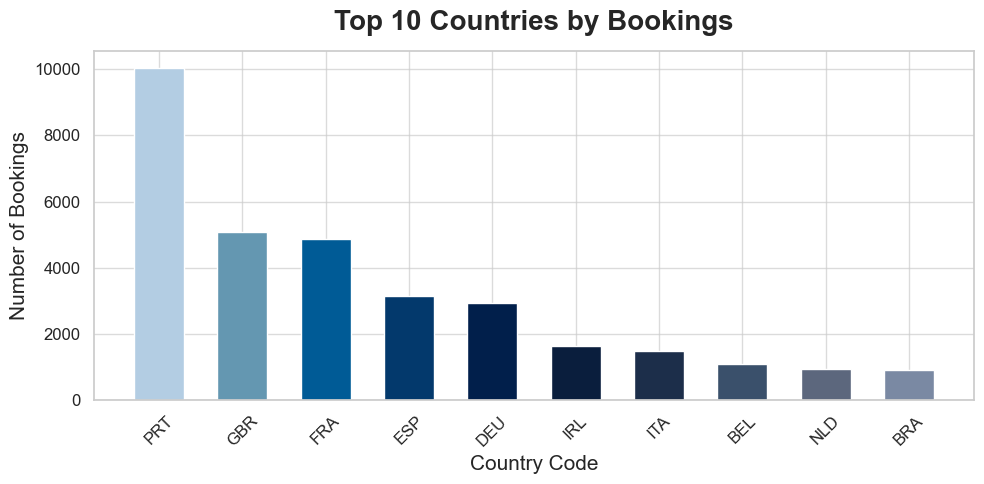

In [ ]:
top_countries = data['country'].value_counts().head(10)

colors = ['#b3cde3', '#6497b1', '#005b96', '#03396c', '#011f4b', '#0a1e3d', '#1c2e4a', '#3a506b', '#5c677d', '#7a89a3']

plt.figure(figsize=(10, 5))
plt.bar(top_countries.index, top_countries.values, color=colors, width=0.6)

plt.title("Top 10 Countries by Bookings", pad=15, fontsize=20, fontweight='bold')
plt.ylabel("Number of Bookings", fontsize=15)
plt.xlabel("Country Code", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha = .7)
plt.tight_layout()
plt.show()

The output indicates that **Portugal (PRT)** is the **top country** in the dataset, accounting for the **highest number of bookings**, highlighting a strong **domestic customer base**.

### **Room and Meal Type Analysis**  
The following plots provide insights into the **most commonly reserved room types** and **most popular meal types**. Understanding these preferences can help hotels optimize their **room allocation** strategies and **meal planning** to better match customer demand.

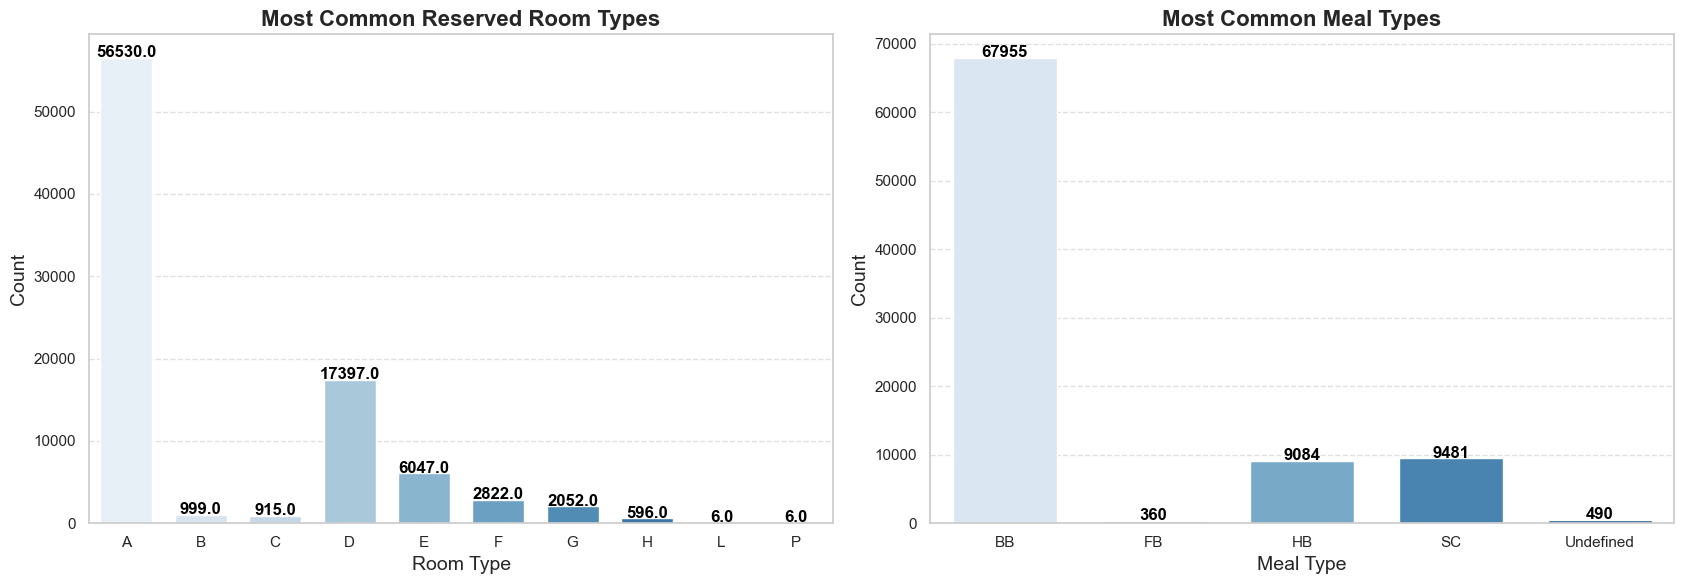

In [ ]:
plt.figure(figsize=(17, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data, x="reserved_room_type", palette="Blues", width = 0.7)
plt.title("Most Common Reserved Room Types", fontsize=16, fontweight='bold')
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center', fontsize=12, fontweight='bold', color='black')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=data['meal'].value_counts().index,  y=data['meal'].value_counts().values,  palette="Blues",  width = 0.7)
plt.title("Most Common Meal Types", fontsize=16, fontweight='bold')
plt.xlabel("Meal Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# print(f"Most common room type is {data['reserved_room_type'].mode()[0]}")
# print(f"Most common meal type is {data['meal'].mode()[0]}")


From the **room type** plot, we can see that **Room Type A** is the most **popular** choice among guests, indicating a high preference for this category. This could be due to factors like **price**, **comfort**, or **availability**.  

In the **meal type** plot, the **Bed & Breakfast (BB)** option stands out as the most **frequently** selected meal plan, reflecting a common guest preference for a **simple** breakfast option, while more comprehensive packages like **Half Board (HB)** and **Full Board (FB)** are less common.

## **Lead Time Distribution**  
This plot shows the **distribution** of **lead times** for hotel bookings, representing the **number of days** between the booking date and the **arrival date**. Understanding this pattern helps in **forecasting demand**, managing **inventory**, and **optimizing pricing** strategies.

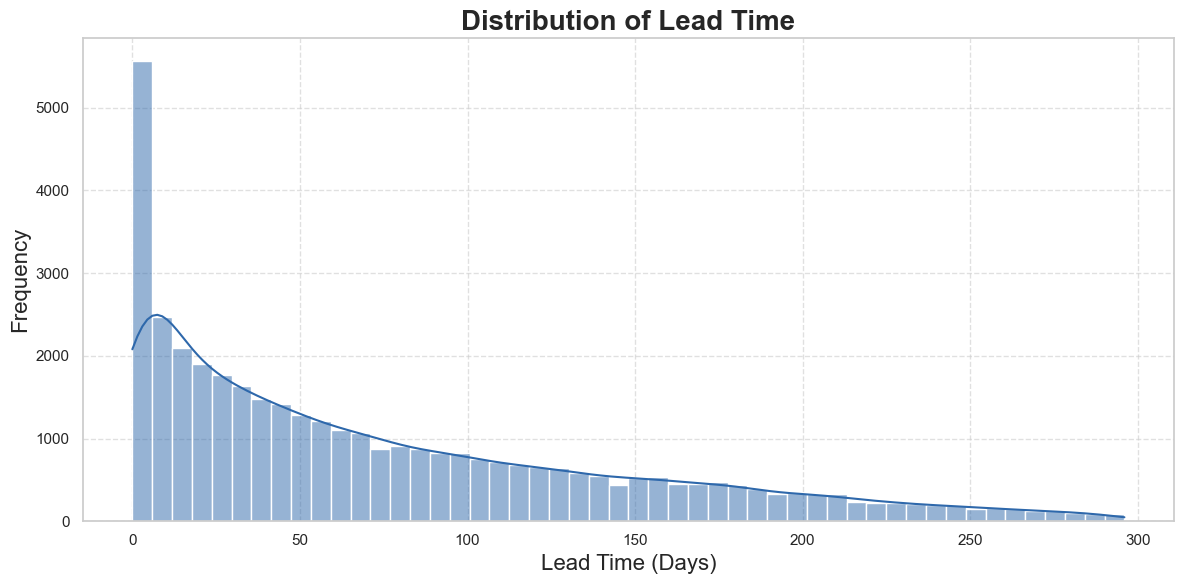

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='lead_time', bins=50, kde=True, color='#2e68ab')
plt.title('Distribution of Lead Time', fontsize=20, fontweight='bold')
plt.xlabel('Lead Time (Days)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The lead time distribution plot reveals that most bookings have relatively short lead times, with a significant peak closer to zero days. However, there is a noticeable long tail, indicating that some guests book their stays far in advance. This distribution suggests that while many customers prefer last-minute bookings, a substantial portion plans their stays well ahead, potentially reflecting differences in customer segments, seasonality, or booking policies.

## Bivariate & Multivariate Analysis

## **Cancellation Rate by Hotel Type**  
This plot highlights the **cancellation rates** for different hotel types, providing insights into **booking behavior**. Understanding these rates can help hotels **predict** cancellations, adjust **pricing strategies**, and manage **inventory** more effectively.

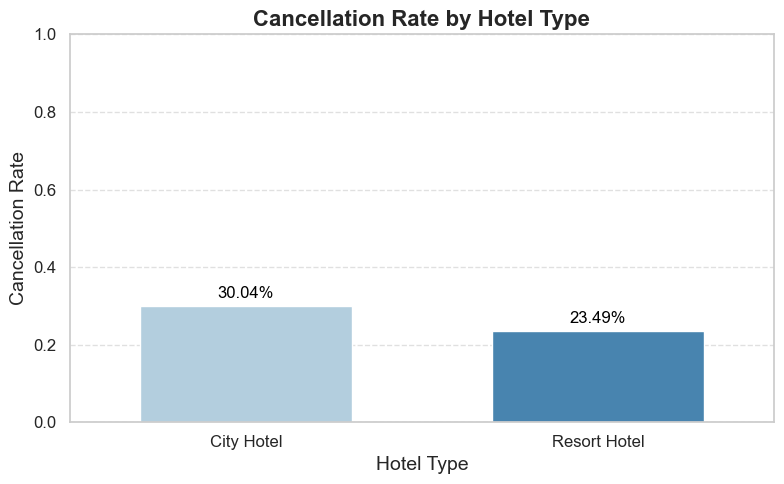

In [ ]:
cancel_rate = data.groupby("hotel")["is_canceled"].mean().reset_index()
plt.figure(figsize=(8, 5))

sns.barplot(data=cancel_rate, x="hotel", y="is_canceled", palette="Blues", width=0.6)

plt.title("Cancellation Rate by Hotel Type", fontsize=16, fontweight='bold')
plt.xlabel("Hotel Type", fontsize=14)
plt.ylabel("Cancellation Rate", fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, row in cancel_rate.iterrows():
    plt.text(i, row["is_canceled"] + 0.02, f"{row['is_canceled']:.2%}", 
             ha='center', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the plot, we can see that **City Hotels** have a **higher** cancellation rate compared to **Resort Hotels**. This difference might be due to the typically more **flexible** booking policies, **shorter** stay durations, or more **frequent** business travel, where plans often **change** at the last minute.

## **Cancellation Rate by Deposit Type**  
This plot shows the **cancellation rates** for different **deposit types**, providing insights into how different **payment strategies** influence customer **commitment**. Understanding these patterns can help hotels design more **effective** pricing and **deposit** policies.

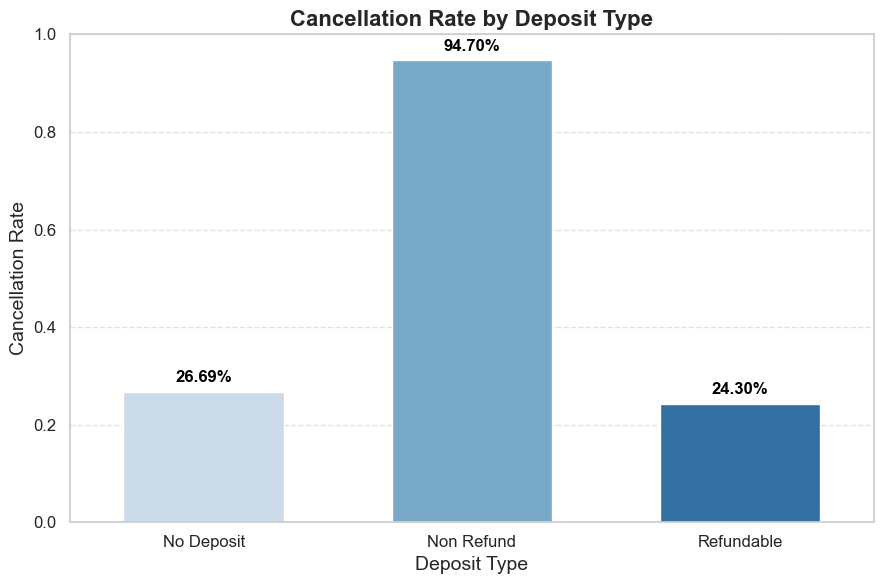

In [ ]:
cancel_by_deposit = data.groupby("deposit_type")["is_canceled"].mean().reset_index()

plt.figure(figsize=(9, 6))

sns.barplot(data=cancel_by_deposit, x="deposit_type", y="is_canceled", palette="Blues", width=0.6)

plt.title("Cancellation Rate by Deposit Type", fontsize=16, fontweight='bold')
plt.xlabel("Deposit Type", fontsize=14)
plt.ylabel("Cancellation Rate", fontsize=14)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, row in cancel_by_deposit.iterrows():
    plt.text(i, row["is_canceled"] + 0.02, f"{row['is_canceled']:.2%}", 
             ha='center', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

High Cancellation Risk with Non-Refund Deposits:

Non-Refundable deposits have an extremely high cancellation rate of 94.70%, indicating that customers who choose this deposit type are significantly more likely to cancel. This suggests a strong correlation between deposit flexibility and booking commitment.

Lower Cancellation for Refundable and No Deposit Options:

No Deposit (26.69%) and Refundable (24.30%) options have much lower cancellation rates, reflecting that guests are more likely to keep their bookings when they have the flexibility to cancel without losing money.

Business Implication:

This highlights a critical risk management insight for hotel revenue strategies. To reduce cancellations, the hotel might consider offering more attractive conditions for non-refundable bookings or incentivizing guests to choose refundable or no-deposit options.

## **Monthly and Yearly Booking Trends**
This plot illustrates the monthly booking trends across different years, providing a comprehensive view of seasonal patterns and year-over-year growth. This kind of analysis is essential for forecasting demand, optimizing pricing, and managing hotel capacity effectively.

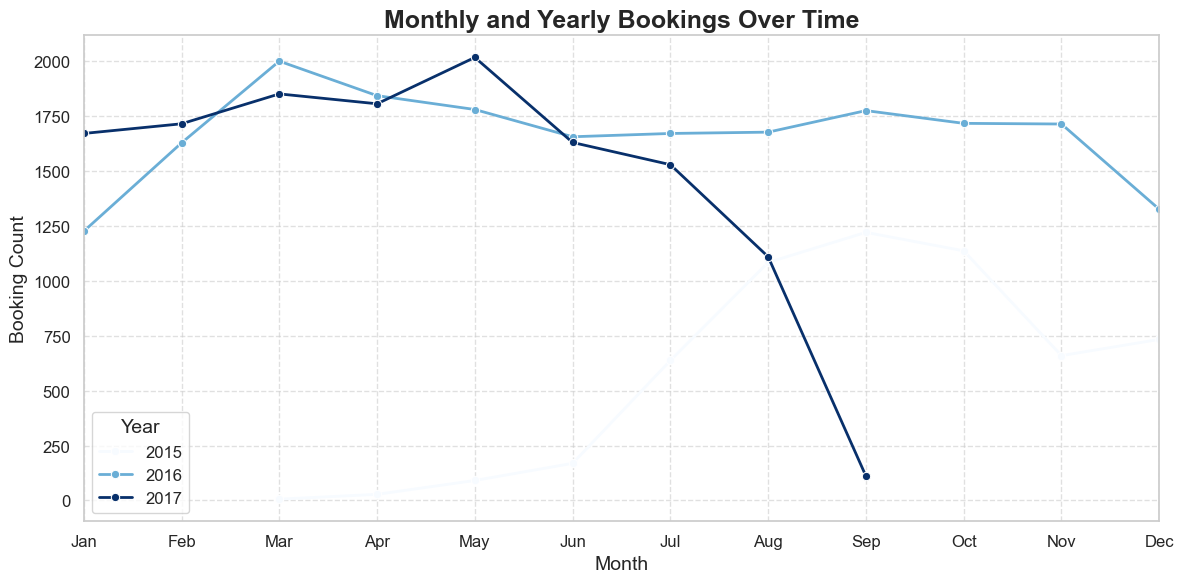

In [ ]:
monthly_bookings = data.groupby(['year', 'month']).size().reset_index(name='booking_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bookings, x='month', y='booking_count', hue='year', marker="o", palette="Blues", linewidth=2)

plt.title('Monthly and Yearly Bookings Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Booking Count', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year', title_fontsize=14, fontsize=12)
plt.xlim(1, 12) 
plt.tight_layout()
plt.show()


The plot reveals a clear seasonal trend, with bookings peaking during the summer months (July and August) and dipping in the winter months (January and February). This is consistent across multiple years, suggesting that summer vacations and holiday seasons significantly drive hotel bookings. Additionally, the steady increase in overall booking counts over the years highlights growing demand in the industry, potentially influenced by travel recovery and global tourism growth.

## **Average Revenue by Customer Type**

This code calculates the **average revenue** generated by each customer type and presents it as a bar chart. The **`total_revenue`** is calculated by multiplying the **average daily rate (ADR)** by the total number of nights stayed (both week and weekend nights). The plot provides insights into the revenue contribution from different customer segments, helping identify the most valuable customer types for the business.

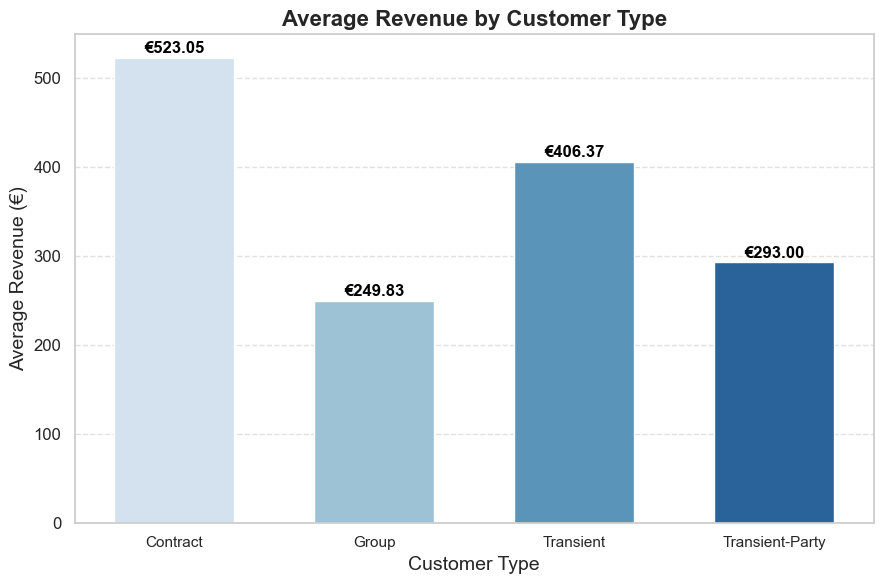

In [107]:
data['total_revenue'] = data['adr'] * (data['stays_in_week_nights'] + data['stays_in_weekend_nights'])

revenue_customer = data.groupby('customer_type')['total_revenue'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(data=revenue_customer, x='customer_type', y='total_revenue', palette='Blues', width=0.6)

plt.title('Average Revenue by Customer Type', fontsize=16, fontweight='bold')
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Average Revenue (€)', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for i, row in revenue_customer.iterrows():
    plt.text(i, row["total_revenue"] + 5, f"€{row['total_revenue']:.2f}", 
             ha='center', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the plot, we can see that **Transient** customers generate the **highest average revenue**, followed by **Transient-Party** customers. This is likely because transient guests often book last-minute at higher rates or stay for shorter periods, resulting in higher per-stay revenue. In contrast, **Contract** and **Group** customers contribute significantly less average revenue, possibly due to discounted rates or long-term agreements that prioritize volume over per-stay profitability.

## **Top 10 Countries by Total Revenue**
This plot showcases the top 10 countries contributing the highest total revenue. The bars are color-coded using a gradient to emphasize the distribution of revenue across these countries, providing a clear comparison of their relative contributions.

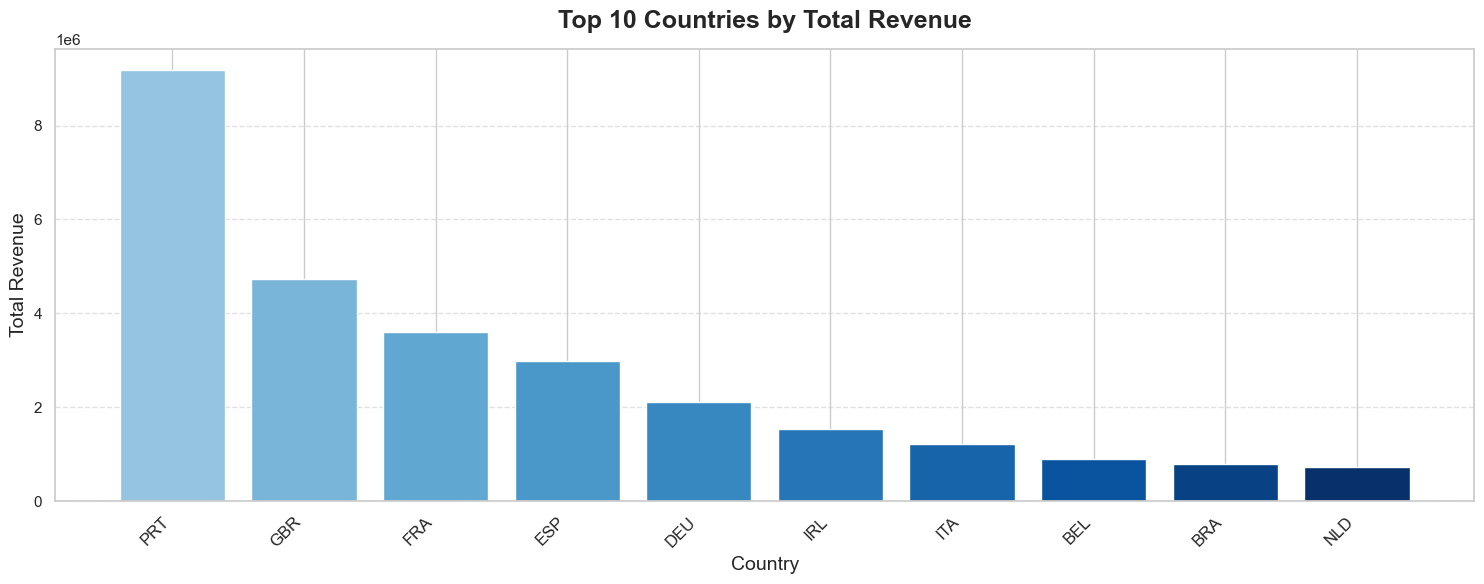

In [ ]:
revenue_country = data.groupby('country')['revenue_per_stay'].sum().sort_values(ascending=False).head(10).reset_index()
colors = plt.cm.Blues(np.linspace(0.4, 1, len(revenue_country)))
plt.figure(figsize=(15, 6))
plt.bar(revenue_country['country'], revenue_country['revenue_per_stay'], color=colors)

plt.title('Top 10 Countries by Total Revenue', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The plot above highlights the top 10 countries by total revenue, with the highest contributions coming from a few dominant markets. It is clear that the majority of revenue is generated by a small group of countries, indicating a significant concentration in revenue sources. This insight can help focus marketing and customer engagement strategies on these high-value regions.

## **Top 10 Countries by Average Daily Rate (ADR)**
This plot shows the top 10 countries with the highest Average Daily Rate (ADR). ADR is a key performance indicator in the hotel industry, representing the average revenue earned per paid occupied room per day. This metric helps assess the revenue-generating ability of hotels across different regions.

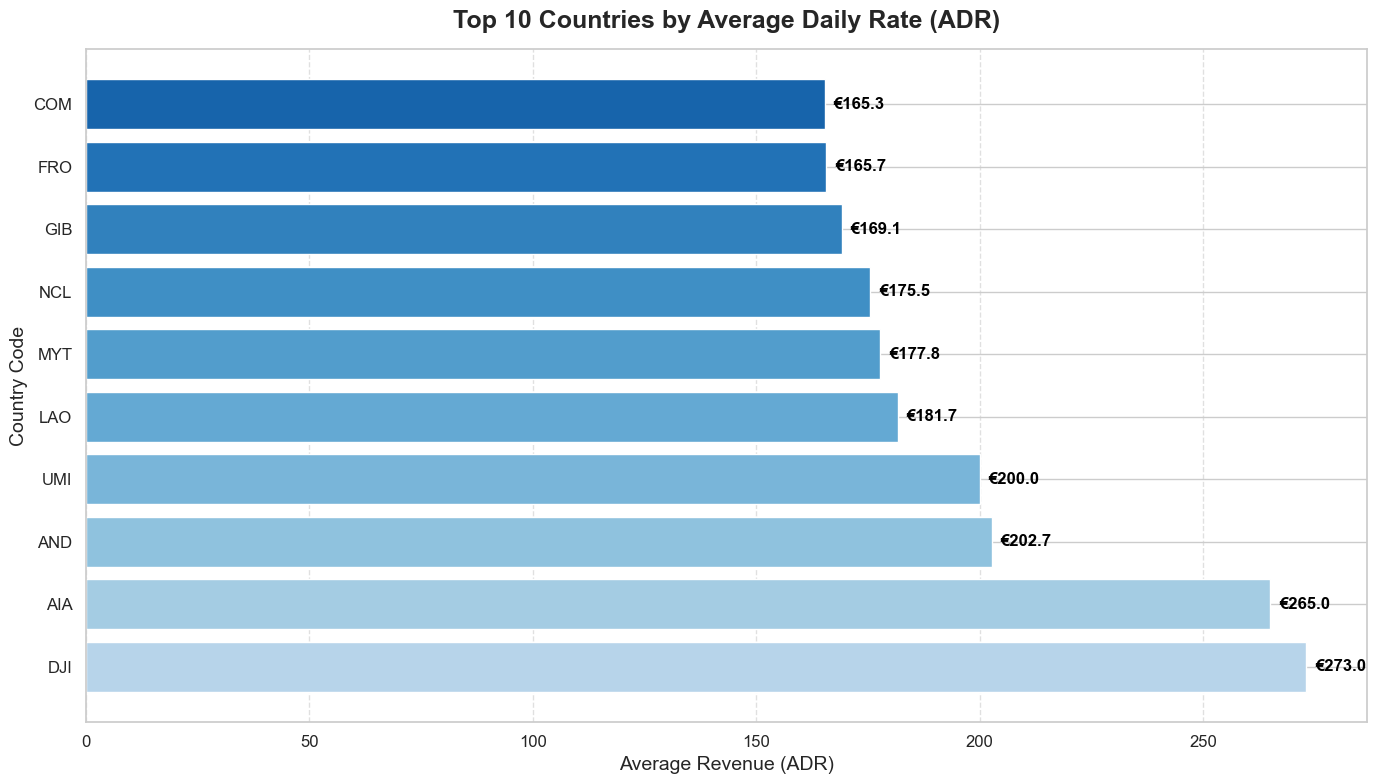

In [130]:
country_revenue = data.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
bars = plt.barh(country_revenue.index, country_revenue.values, color=plt.cm.Blues(np.linspace(0.3, 0.8, len(country_revenue))))

plt.title('Top 10 Countries by Average Daily Rate (ADR)', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Average Revenue (ADR)', fontsize=14)
plt.ylabel('Country Code', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2., f'€{width:.1f}', va='center', ha='left', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

From the plot, we observe that the country with the highest average daily rate (ADR) is significantly ahead of others, indicating that guests from this country tend to book more expensive accommodations. This likely reflects differences in purchasing power, travel preferences, or hotel pricing strategies in these regions.

## **Guest Type Distribution (New vs Repeated)**
This plot compares the distribution of new (0) and repeated (1) guests in the dataset, helping us understand the proportion of returning customers.

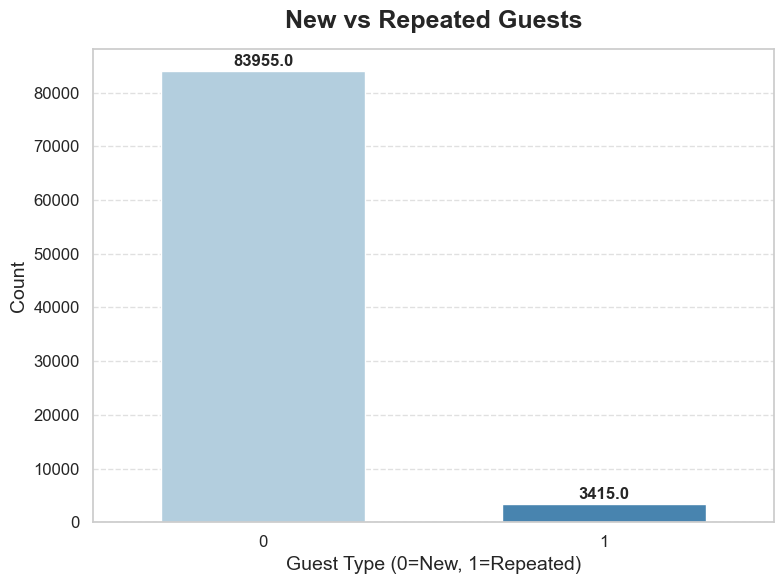

In [ ]:
plt.figure(figsize=(8, 6))
bars = sns.countplot(data=data, x='is_repeated_guest', palette="Blues", width=0.6)
plt.title('New vs Repeated Guests', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Guest Type (0=New, 1=Repeated)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p in bars.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1000, f'{height}', ha='center', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The plot shows that the vast majority of bookings are made by new guests, while a much smaller portion comes from repeat customers. This indicates that most guests are likely visiting the hotels for the first time, highlighting an opportunity to improve customer retention and loyalty.

##  **Correlation Matrix of Numerical Features**

This heatmap visualizes the correlation between various numerical features in the dataset. It highlights the strength and direction of relationships between variables, where:

- **Positive Correlation (+1)**: Variables move in the same direction.
- **Negative Correlation (-1)**: Variables move in opposite directions.
- **No Correlation (0)**: No clear relationship between the variables.

Understanding these correlations can help identify influential features for modeling and uncover hidden patterns in the data.

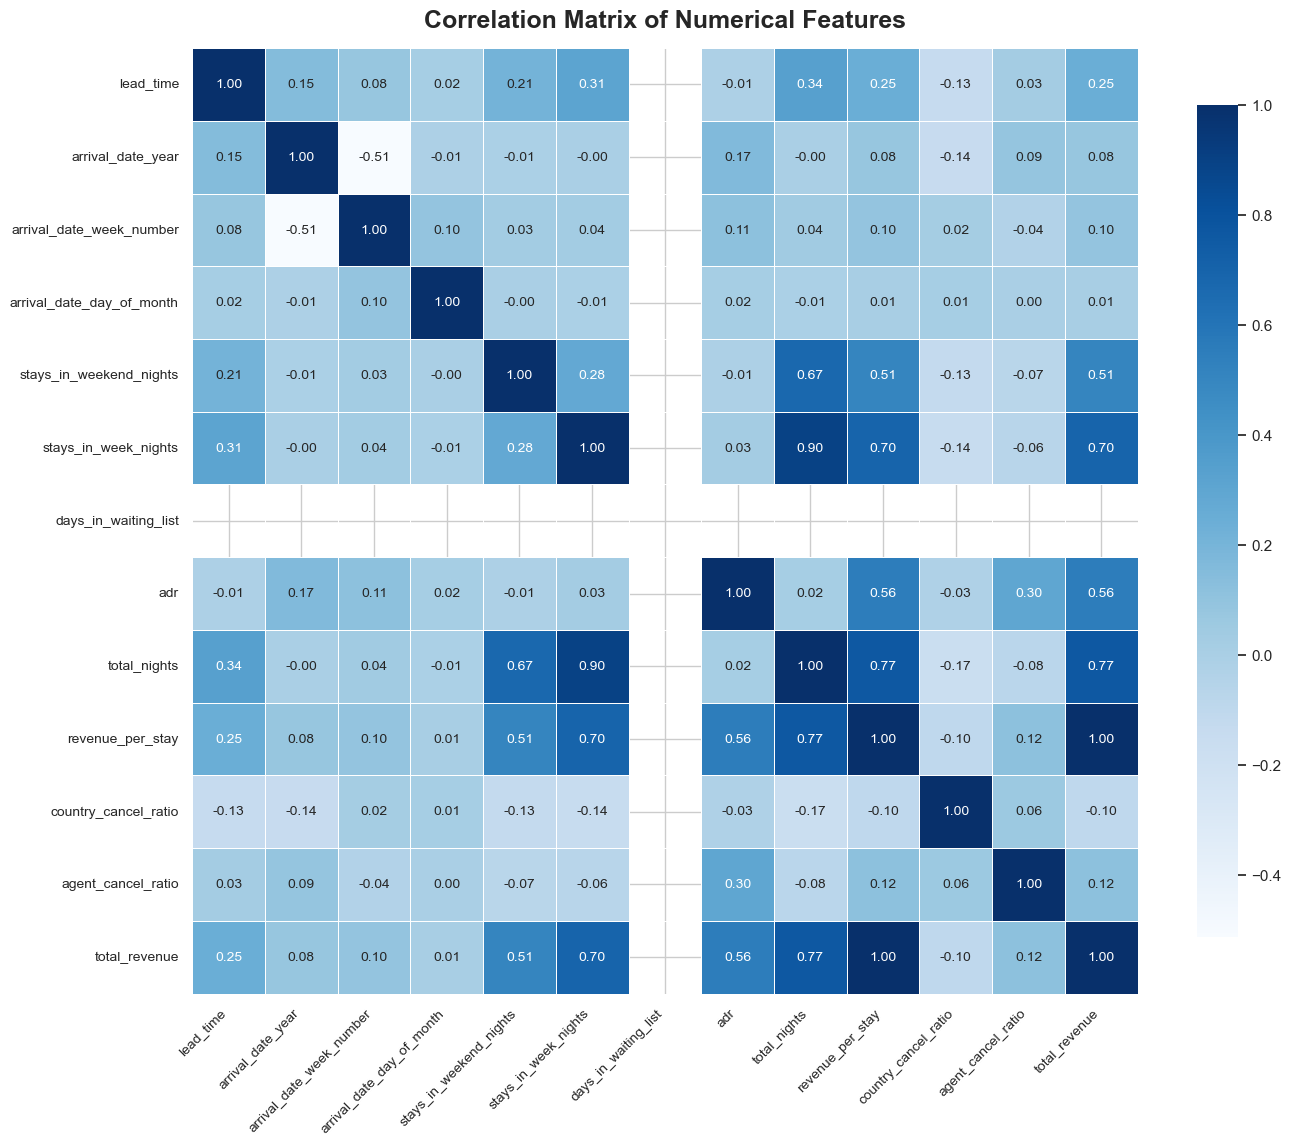

In [ ]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

From the correlation matrix, we observe the following key points:

1. **Strong Positive Correlation**:
   - There is a strong positive correlation between **`stays_in_week_nights`** and **`total_revenue`**, indicating that longer stays typically generate more revenue.
   - **`lead_time`** also shows a moderate positive correlation with **`is_canceled`**, suggesting that bookings made further in advance have a higher chance of cancellation.

2. **Weak or No Correlation**:
   - Some features like **`arrival_date_year`** and **`is_repeated_guest`** show very weak or no correlation with other numerical features, indicating they might not be as impactful for predicting revenue or cancellations.

3. **Negative Correlation**:
   - **`adr`** and **`is_canceled`** have a slight negative correlation, which might imply that higher daily rates could be associated with a lower likelihood of cancellation.

Overall, this matrix provides a foundational understanding of the relationships within the data, which can guide further analysis and feature selection.

## **Analyzing Special Requests by Booking Status**

This code generates three different plots to analyze the distribution of special requests based on booking status:

1. **Violin Plot:**  
   This plot provides a comprehensive view of the distribution of special requests for both canceled and non-canceled bookings. It captures the spread, density, and central tendency (mean and median) of the data, revealing the overall shape of the distribution.

2. **Swarm Plot:**  
   Given the large dataset, a sample of 5,000 points is used to visualize individual data points. This plot helps identify clusters and potential outliers, providing a clearer picture of the frequency and distribution of special requests.

3. **Point Plot:**  
   This plot displays the average number of special requests for canceled and non-canceled bookings, with error bars representing the standard deviation. It highlights the overall difference in special request patterns based on booking status.

Together, these plots offer a comprehensive view of how special requests vary depending on whether a booking was canceled or not, helping identify potential trends and customer behaviors.

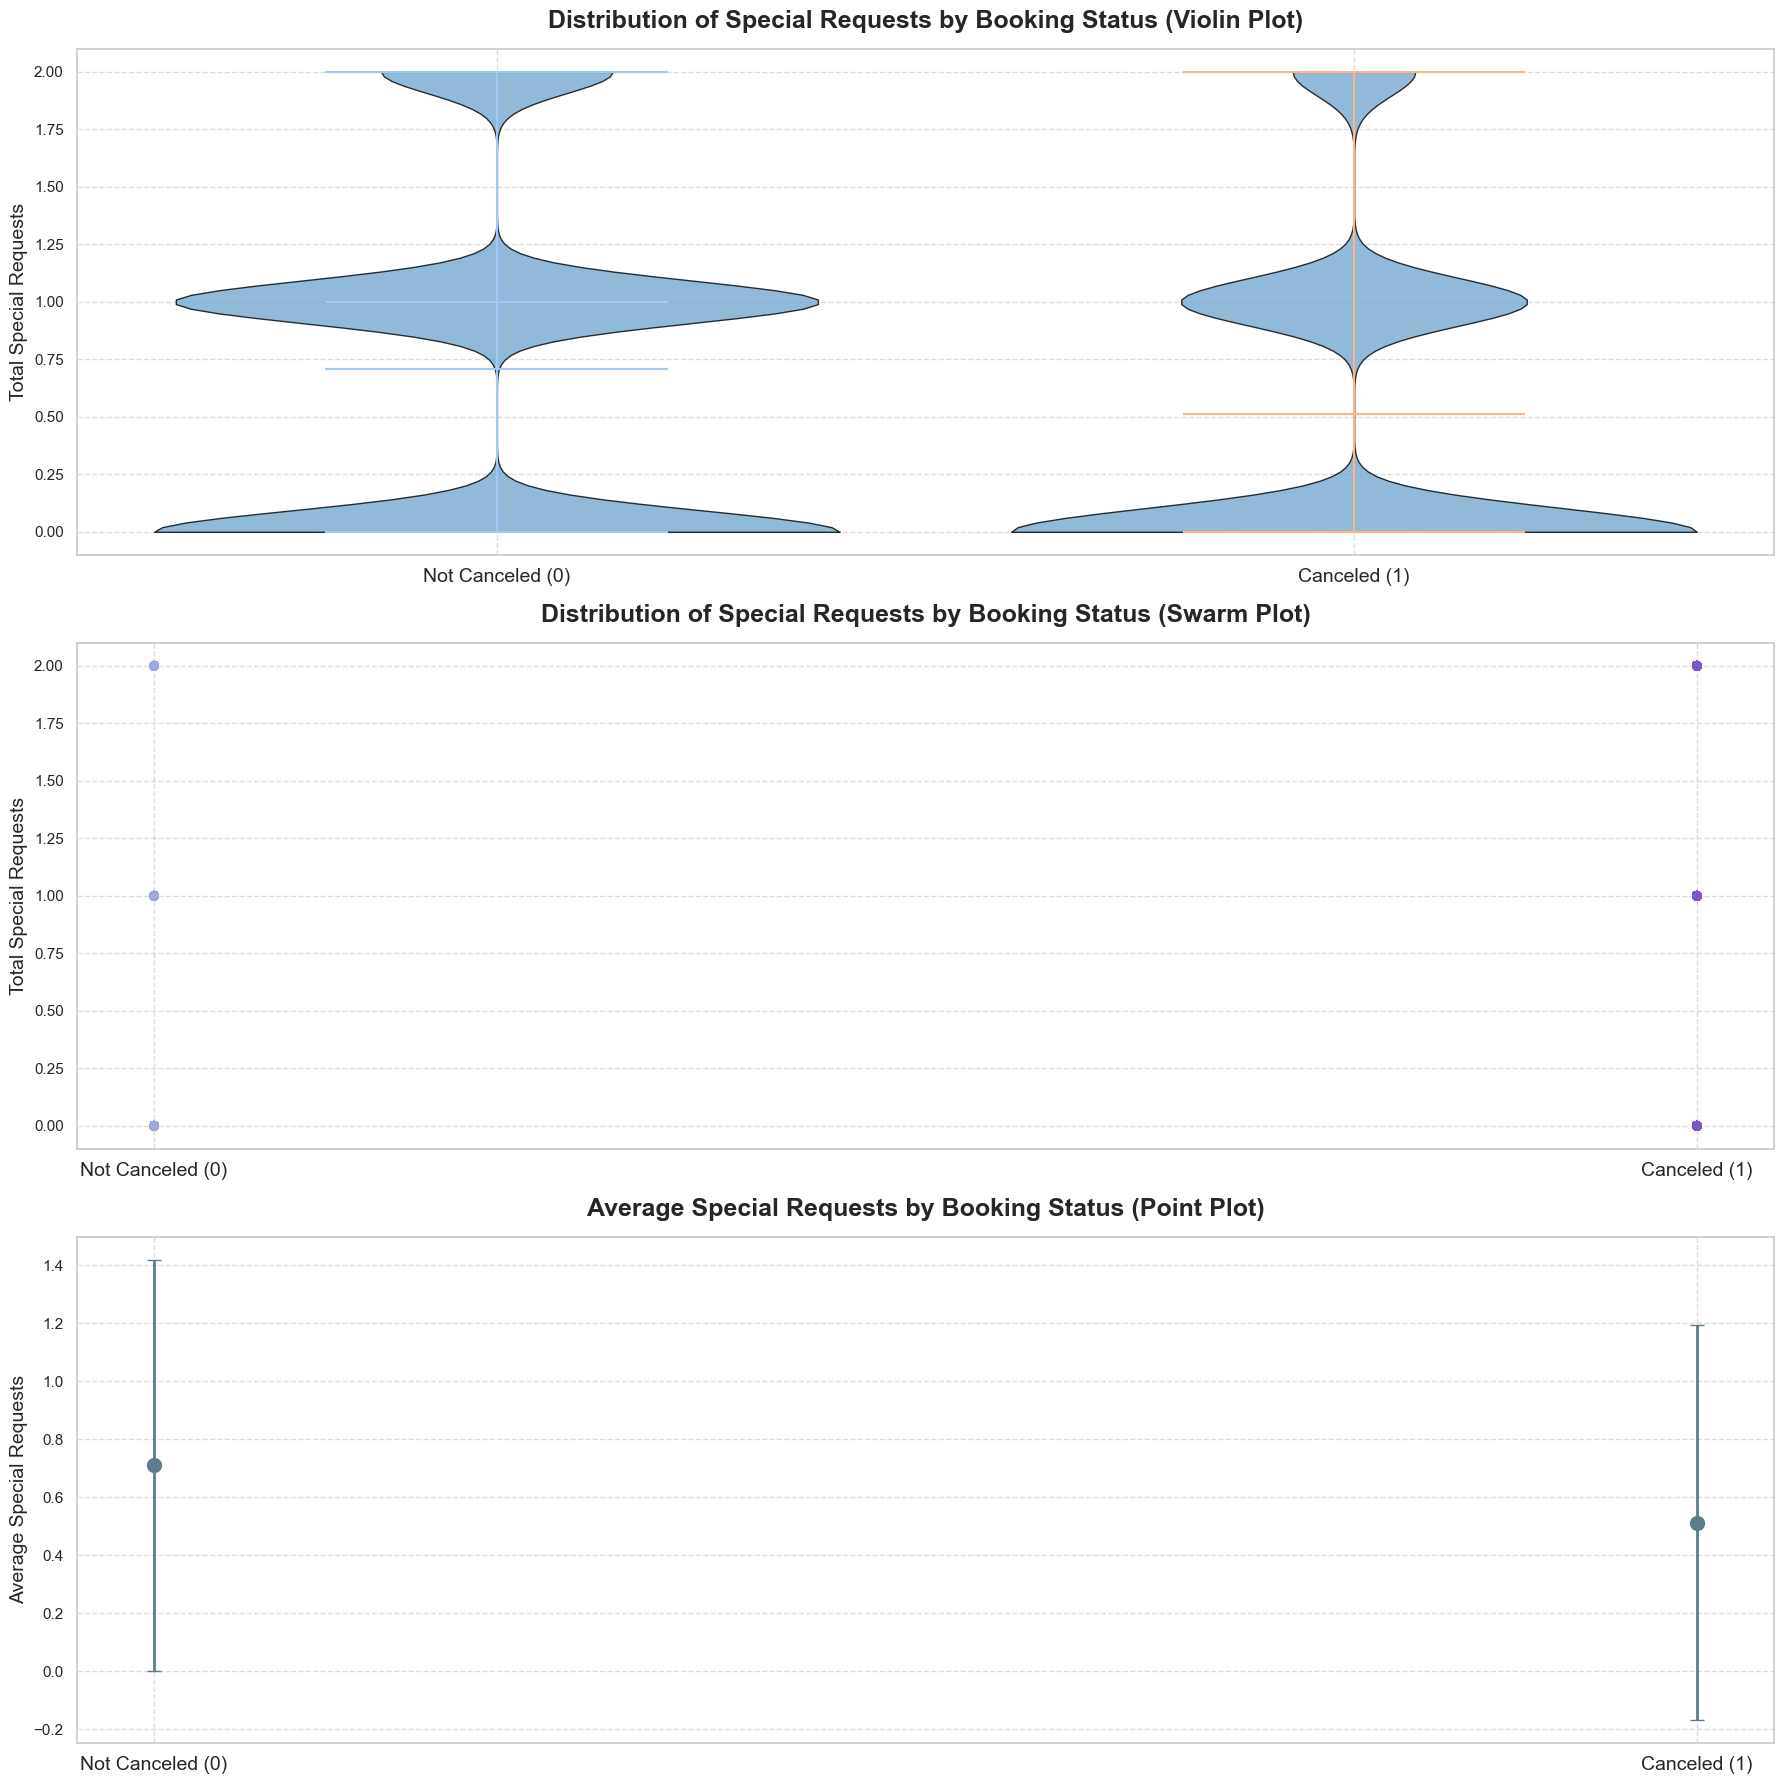

In [55]:
plt.figure(figsize=(18, 18))

# Violin Plot
plt.subplot(3, 1, 1)
for status in [0, 1]:
    values = data[data['is_canceled'] == status]['total_of_special_requests']
    parts = plt.violinplot(values, positions=[status], showmeans=True, showmedians=True, widths=0.8)
    for pc in parts['bodies']:
        pc.set_facecolor('#74A9CF')
        pc.set_edgecolor('black')
        pc.set_alpha(0.8)
plt.title('Distribution of Special Requests by Booking Status (Violin Plot)', fontsize=18, fontweight='bold', pad=15)
plt.xticks([0, 1], ['Not Canceled (0)', 'Canceled (1)'], fontsize=14)
plt.ylabel('Total Special Requests', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Swarm Plot (Sampled for Performance)
plt.subplot(3, 1, 2)
sample_size = min(len(data), 5000)
sampled_data = data.sample(sample_size, random_state=42)
colors = ['#9FA8DA' if x == 0 else '#7E57C2' for x in sampled_data['is_canceled']]
plt.scatter(sampled_data['is_canceled'], sampled_data['total_of_special_requests'], alpha=0.6, color=colors)
plt.title('Distribution of Special Requests by Booking Status (Swarm Plot)', fontsize=18, fontweight='bold', pad=15)
plt.xticks([0, 1], ['Not Canceled (0)', 'Canceled (1)'], fontsize=14)
plt.ylabel('Total Special Requests', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Point Plot
plt.subplot(3, 1, 3)
avg_requests = data.groupby('is_canceled')['total_of_special_requests'].mean()
std_requests = data.groupby('is_canceled')['total_of_special_requests'].std()
plt.errorbar([0, 1], avg_requests, yerr=std_requests, fmt='o', color='#5D7D8B', capsize=5, markersize=10, linewidth=2)
plt.title('Average Special Requests by Booking Status (Point Plot)', fontsize=18, fontweight='bold', pad=15)
plt.xticks([0, 1], ['Not Canceled (0)', 'Canceled (1)'], fontsize=14)
plt.ylabel('Average Special Requests', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



From these visualizations, we can observe the following:

- **Violin Plot:** Shows that both canceled and non-canceled bookings tend to have a similar distribution of special requests, but the non-canceled bookings have a slightly higher concentration of lower request counts, indicating that bookings with fewer special requests are more likely to be completed.

- **Swarm Plot:** Confirms this pattern at the individual booking level, where the majority of bookings (both canceled and non-canceled) tend to have fewer special requests, but canceled bookings show a more scattered distribution.

- **Point Plot:** Clearly highlights that, on average, non-canceled bookings tend to have slightly more special requests, suggesting that customers with specific needs might be more committed to their stays.

These plots together provide a deeper understanding of the relationship between special requests and booking outcomes.

## **Monthly Successful Bookings and Cancellations**

This code visualizes the monthly trends of both successful bookings and cancellations over the years in the hotel dataset. It plots two separate line charts within the same figure:
- **Successful Bookings:** Represented with solid lines and circle markers.
- **Cancellations:** Represented with dashed lines and cross markers.

The plot provides a clear comparison between the two trends, making it easier to identify seasonal patterns and year-over-year changes.

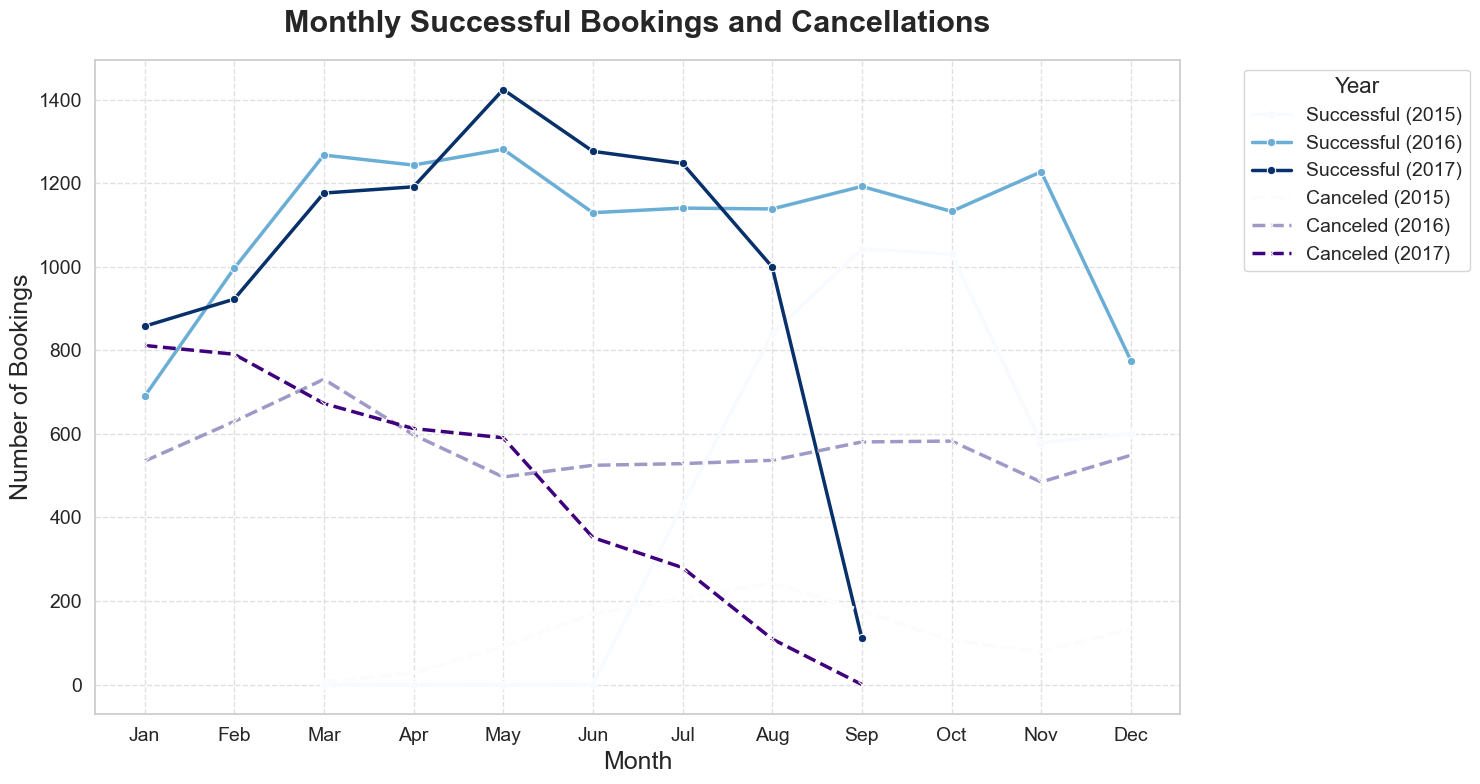

In [ ]:
monthly = data.groupby(['year', 'month'])['is_canceled'].agg(['count', 'sum']).reset_index()
monthly.rename(columns={'count': 'total_bookings', 'sum': 'cancellations'}, inplace=True)
monthly['successful_bookings'] = monthly['total_bookings'] - monthly['cancellations']

plt.figure(figsize=(15, 8))

sns.lineplot(data=monthly, x='month', y='successful_bookings', hue='year', 
             marker='o', linewidth=2.5, palette='Blues', legend=True)

sns.lineplot(data=monthly, x='month', y='cancellations', hue='year', 
             marker='x', linewidth=2.5, palette='Purples', legend=True, linestyle='--')

# Titles and labels
plt.title("Monthly Successful Bookings and Cancellations", fontsize=22, fontweight='bold', pad=20)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Number of Bookings", fontsize=18)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.yticks(fontsize=14)

handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = [f"Successful ({year})" if i < len(labels) // 2 else f"Canceled ({year})" 
                 for i, year in enumerate(labels)]
plt.legend(handles, custom_labels, title='Year', fontsize=14, title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


From the plot, we can observe a few key trends:  

1. **Seasonal Peaks:** Successful bookings generally peak during the summer months (June to August), reflecting the high demand during the vacation season.  
2. **Winter Drop:** Bookings tend to decline during the winter months, particularly in January and February, likely due to lower travel demand.  
3. **High Cancellation Rates:** The dashed lines representing cancellations show that a significant portion of bookings are canceled, with noticeable spikes around the same summer peak, indicating potential overbooking or changing travel plans.  
4. **Yearly Variations:** Different years show varying booking volumes, possibly reflecting external factors like economic conditions, travel restrictions, or changes in customer behavior.  

## **Lead Time vs Total Revenue (Color by Cancellation Status)**

This scatter plot visualizes the relationship between **Lead Time** and **Total Revenue** for hotel bookings, with points colored based on the **Cancellation Status**. It provides insights into how the length of time between booking and check-in can impact the total revenue generated and the likelihood of cancellation. Longer lead times may have different cancellation patterns compared to shorter ones, which can inform pricing and booking strategies. 

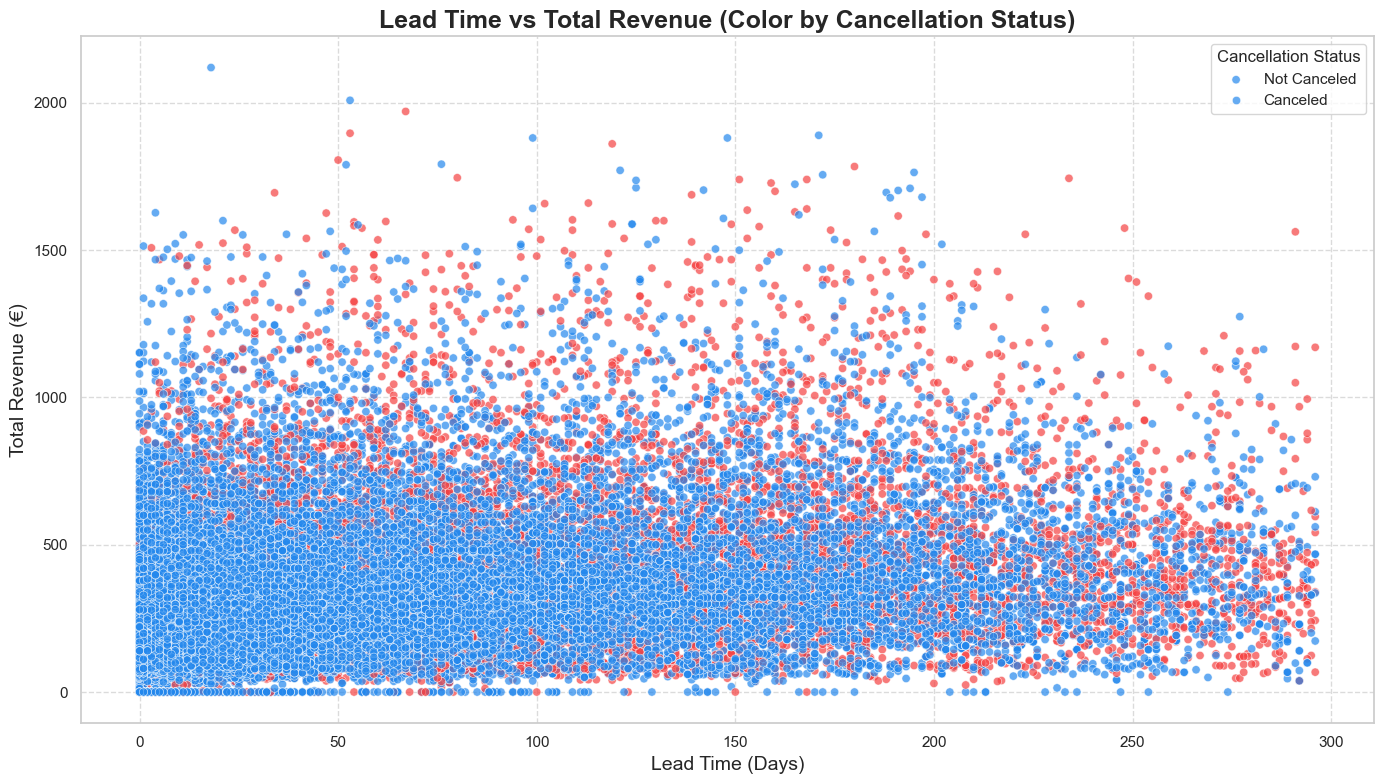

In [52]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='lead_time', y='total_revenue', hue='is_canceled', alpha=0.7, palette=['#2488ed', '#f54242'])
plt.title('Lead Time vs Total Revenue (Color by Cancellation Status)', fontsize=18, fontweight='bold')
plt.xlabel('Lead Time (Days)', fontsize=14)
plt.ylabel('Total Revenue (€)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

From the plot, we observe a clear distinction between canceled and non-canceled bookings based on lead time. Bookings with longer lead times tend to have a higher likelihood of cancellation, as indicated by the concentration of red points. In contrast, shorter lead times are associated with more successful stays, resulting in completed bookings and higher revenue. This suggests that while long lead times might bring more bookings, they also come with a greater risk of cancellation, highlighting the need for careful revenue management and booking strategies.

## **Lead Time by Reservation Status (Boxplot)**
The following code generates a boxplot to visualize the relationship between reservation status and lead time. This type of plot effectively captures the distribution, median, and range of lead times for each reservation status. It also highlights any significant differences in booking behavior based on the final status of the reservation (e.g., "Canceled", "Check-Out", "No-Show"). This is useful for identifying patterns, such as whether cancellations tend to have longer lead times.

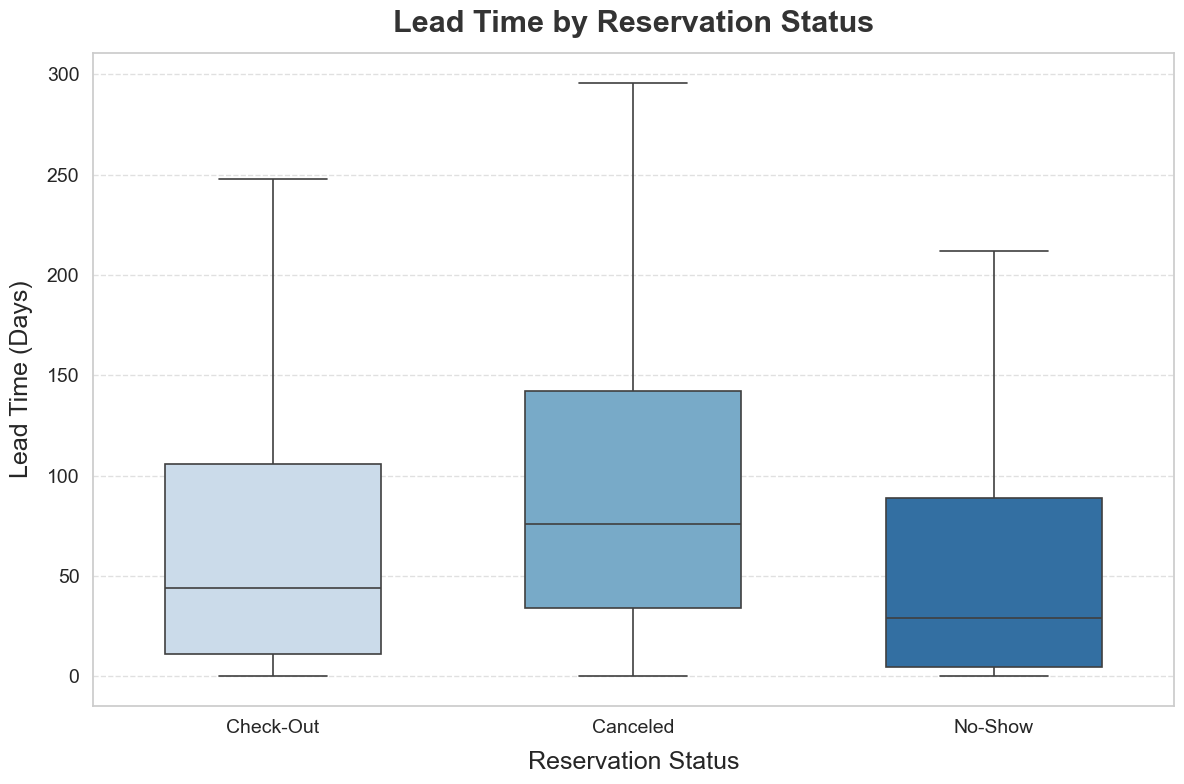

In [33]:
data['reservation_status'] = data['reservation_status'].astype(str)

plt.figure(figsize=(12, 8))

sns.boxplot(data=data, x='reservation_status', y='lead_time', palette='Blues', showfliers=False, linewidth=1.2, width=0.6)
plt.title("Lead Time by Reservation Status", fontsize=22, fontweight='bold', pad=15, color="#333333")
plt.xlabel("Reservation Status", fontsize=18, labelpad=10)
plt.ylabel("Lead Time (Days)", fontsize=18, labelpad=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


From the boxplot, we can observe that:

**Canceled Reservations** generally have longer lead times, indicating that guests who book further in advance are more likely to cancel their reservations.

**Checked-Out Reservations** tend to have shorter and more consistent lead times, suggesting that last-minute bookings are more likely to convert into successful stays.

**No-Show Reservations** have a wide range of lead times, but the median lead time is still lower than that for canceled reservations.

Overall, lead time appears to be a strong indicator of the likelihood of cancellation, highlighting the importance of managing booking windows and cancellation policies to reduce revenue loss.

---

## **Data Preparation and Comprehensive Relationship Analysis Completed**
The data has been thoroughly prepared, and a detailed bivariate and multivariate analysis has been performed to reveal critical insights and patterns.

---

## **Comprehensive Insights and Business Recommendations for Hotel Bookings Dataset**
After a thorough exploration of the dataset, here are the key insights and actionable recommendations that can drive significant improvements in business strategy and operations for the hotel. These insights are drawn from both univariate, bivariate, and multivariate analyses, covering a wide range of factors:

### 1. **Lead Time and Booking Cancellations**    
**Insight**: Longer lead times are strongly correlated with higher cancellation rates. Customers booking further in advance tend to cancel more frequently.
                
**Recommendation**: Implement flexible pricing strategies for long lead time bookings, such as non-refundable options or requiring deposits to reduce cancellations. Automated reminders closer to the check-in date could also reduce the likelihood of cancellations.

### 2. **Revenue by Customer Type**
**Insight**: 'Transient' customers contribute the most to total revenue but have a higher cancellation rate. 'Contract' customers have lower average revenue per stay but more stable bookings.

**Recommendation**: Focus marketing efforts on retaining 'Contract' customers, while using targeted promotions to reduce cancellations among 'Transient' customers, such as offering personalized incentives or loyalty programs.

### 3. **Impact of Special Requests on Cancellations**
**Insight**: Guests with more special requests are less likely to cancel, indicating higher commitment to their booking.

**Recommendation**: Encourage guests to make special requests during the booking process, possibly through personalized prompts or upselling options, to increase booking stickiness.

### 4. **Seasonal Trends in Bookings and Cancellations**
**Insight**: The volume of bookings and cancellations varies significantly across months and years, with peaks in the summer and lower activity in the winter.

**Recommendation**: Use this information to optimize staffing, marketing spend, and room pricing based on seasonal demand. Implement dynamic pricing models to maximize occupancy and revenue.

### 5. **Market Segment Insights**
**Insight**: The majority of bookings come from 'Online Travel Agents (OTA)' and 'Direct' channels, which also have higher cancellation rates.

**Recommendation**: Diversify marketing channels to reduce reliance on OTA commissions and explore more direct booking incentives. Partner with corporate clients and agencies to stabilize revenue streams.

### 6. **Impact of Deposit Type on Cancellations**
**Insight**: Bookings with 'No Deposit' have significantly higher cancellation rates compared to those with 'Non-Refundable' or 'Refundable' deposits.

**Recommendation**: Increase the proportion of bookings requiring deposits or offer significant discounts for non-refundable bookings to reduce cancellations and improve cash flow.

### 7. **Country-Specific Revenue Insights**
**Insight**: Certain countries contribute a significant share of total revenue, while others have higher cancellation rates.

**Recommendation**: Tailor marketing strategies by region, focusing on retaining high-value customers and improving cancellation rates for high-risk markets.

### 8. **Booking Distribution and ADR (Average Daily Rate)**
**Insight**: ADR varies significantly across customer types, market segments, and reservation statuses, affecting overall profitability.

**Recommendation**: Use personalized pricing strategies based on customer segmentation to optimize revenue. Consider premium packages for high ADR segments.

### 9. **Special Requests as a Loyalty Indicator**
**Insight**: Guests making multiple special requests are less likely to cancel, indicating stronger customer loyalty.

**Recommendation**: Use special requests as a signal for potential repeat business and create targeted loyalty programs for these guests.

### 10. **Room Type Mismatches and Overbooking**
**Insight**: Mismatched room allocations (reserved vs. assigned) can lead to customer dissatisfaction and potential cancellations.

**Recommendation**: Improve inventory management and forecasting to reduce the likelihood of room mismatches, potentially integrating real-time room availability systems.



---